In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [167]:
###############0. load the files
df = pd.read_excel('data.xlsx', header=[0,1])
df.columns = df.columns.map('_'.join)
df = df.rename(columns = {'Tags_Unnamed: 0_level_1':'Tags', 'Tags_eng_Unnamed: 1_level_1':'Tags_eng'})
df

,Tags,Tags_eng,一月_热度,一月_差评,二月_热度,二月_差评,三月_热度,三月_差评
0,合身,fitness,20,10.0,22,20.0,21.0,20.0
1,面料,material,15,20.0,13,10.0,12.0,10.0
2,风格,style,30,30.0,33,15.0,32.0,20.0
3,保暖,warmth,25,22.0,24,22.0,25.0,28.0
4,价格,price,40,28.0,43,25.0,43.0,22.0
5,物流,logistic,10,12.0,17,16.0,17.0,13.0
6,售后,after service,5,9.0,3,11.0,10.0,16.0
7,满意,satisfaction,35,23.0,25,23.0,20.0,20.0
8,推荐,recommendation,8,11.0,12,12.0,14.0,10.0
9,回购,repurchase,12,16.0,18,23.0,18.0,15.0


In [168]:
####################part1 - plotting

In [169]:
def scatter_plot(month):
    
    if month == 1:
        var = '一月'
        title = 'Januaray'
    elif month == 2:
        var = '二月'
        title = 'Febuaray'
    elif month == 3:
        var = '三月'
        title = 'March'
        
    x=df[var+'_热度'].tolist()
    y=df[var+'_差评'].tolist()
    classes = df['Tags_eng'].unique().tolist()

    
    g = sns.relplot(kind='scatter', data=df, x=x, y=y, hue=classes, legend='full')
    plt.xlabel("Popularity")
    plt.ylabel('negative comment')
    plt.title(title)    
    
    return plt

C:\Users\Bonita\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<module 'matplotlib.pyplot' from 'C:\\Users\\Bonita\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

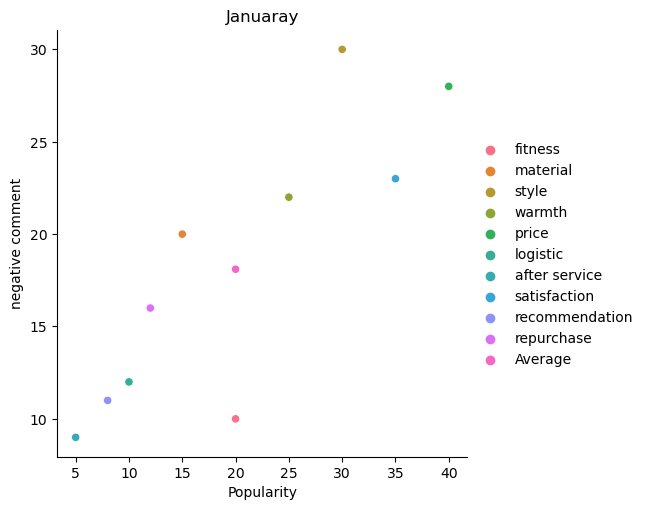

In [170]:
####一月
scatter_plot(1)

C:\Users\Bonita\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<module 'matplotlib.pyplot' from 'C:\\Users\\Bonita\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

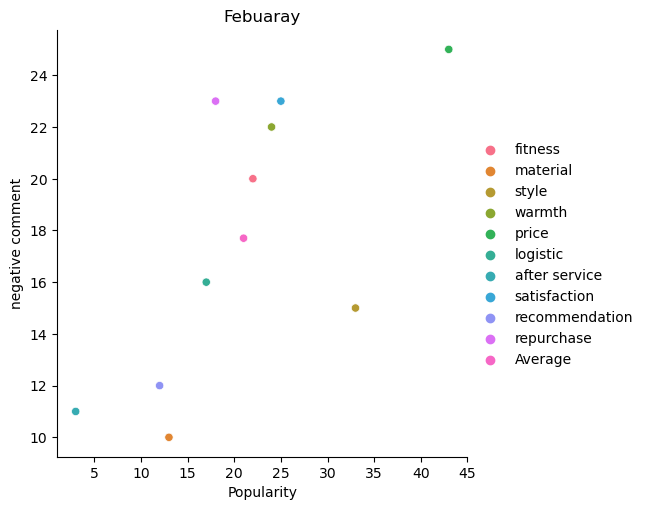

In [171]:
####二月
scatter_plot(2)

C:\Users\Bonita\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<module 'matplotlib.pyplot' from 'C:\\Users\\Bonita\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

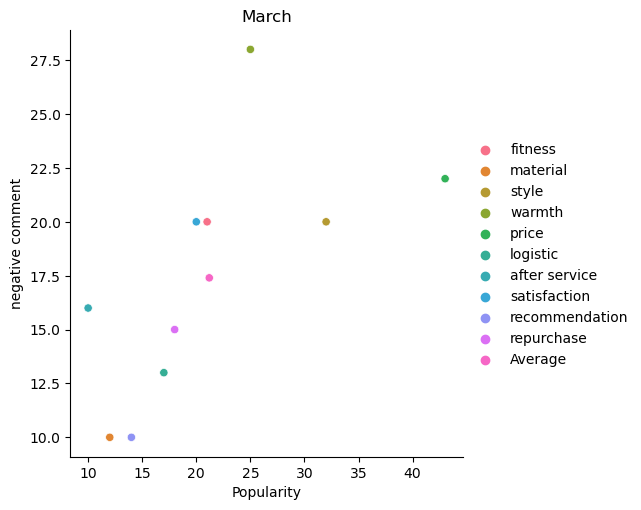

In [172]:
####三月
scatter_plot(3)

In [173]:
####################part2 - text generation

In [174]:
df = pd.read_excel('data.xlsx', header=[0,1])
df.columns = df.columns.map('_'.join)
df = df.rename(columns = {'Tags_Unnamed: 0_level_1':'Tags', 'Tags_eng_Unnamed: 1_level_1':'Tags_eng'})
df

,Tags,Tags_eng,一月_热度,一月_差评,二月_热度,二月_差评,三月_热度,三月_差评
0,合身,fitness,20,10.0,22,20.0,21.0,20.0
1,面料,material,15,20.0,13,10.0,12.0,10.0
2,风格,style,30,30.0,33,15.0,32.0,20.0
3,保暖,warmth,25,22.0,24,22.0,25.0,28.0
4,价格,price,40,28.0,43,25.0,43.0,22.0
5,物流,logistic,10,12.0,17,16.0,17.0,13.0
6,售后,after service,5,9.0,3,11.0,10.0,16.0
7,满意,satisfaction,35,23.0,25,23.0,20.0,20.0
8,推荐,recommendation,8,11.0,12,12.0,14.0,10.0
9,回购,repurchase,12,16.0,18,23.0,18.0,15.0


In [175]:
def text_generation_each(df, month, var): 

    if month == 1:
        var_month = '一月'
    elif month == 2:
        var_month = '二月'
        compare_month = '一月'
    elif month == 3:
        var_month = '三月'
        compare_month = '二月'
    
    ######1. sorting based on var 热度/差评
    text_title = var+'變化\n'
    
    sort_df = df[:10].sort_values([var_month+'_'+var], ascending = False)
    
    text_sort = var_month+'的'+var+'标签热度從高到低順序如下:'
    for k in range(0, len(sort_df)):
        
        if k == len(sort_df)-1:
            text_sort = text_sort + sort_df['Tags'].iloc[k] + '('+str(int(sort_df[var_month+'_'+var].iloc[k])) +')' + '。'
        else:
            text_sort = text_sort + sort_df['Tags'].iloc[k] + '('+str(int(sort_df[var_month+'_'+var].iloc[k])) +')' +','
    
    text_sort = text_sort + '平均的' + var + '是' + str(df[df['Tags']=='Average'][var_month+'_'+var].iloc[0]) + '。'
        
        
    ######2. comparing the difference of different month on same var
    compare_df = df[:10]
    compare_df['diff'] = compare_df[var_month+'_'+var] - compare_df[compare_month+'_'+var]
    
    text_compare = '比較'+var_month +'和'+compare_month+'的热度變化,'
    
    ###a.increase
    compare_df_inc = compare_df[compare_df['diff']> 0]
    compare_df_inc = compare_df_inc.sort_values(['diff'], ascending = False)
    
    text_compare_inc = var+'增加的标签從高到低順序如下：'
    if len(compare_df_inc) > 0:
    
        for k in range(0, len(compare_df_inc)):

            if k == len(compare_df_inc)-1:
                text_compare_inc = text_compare_inc + compare_df_inc['Tags'].iloc[k] + '(+'+str(int(compare_df_inc['diff'].iloc[k])) +')' + '。'
            else:
                text_compare_inc = text_compare_inc + compare_df_inc['Tags'].iloc[k] + '(+'+str(int(compare_df_inc['diff'].iloc[k])) +')' + ','
    else:
        text_compare_inc = ''
        
        
    ###b.decrease
    compare_df_dec = compare_df[compare_df['diff']< 0]
    compare_df_dec = compare_df_dec.sort_values(['diff'], ascending = True)
    
    text_compare_dec = var+'减少的标签從高到低順序如下：'
    if len(compare_df_dec) > 0:

        for k in range(0, len(compare_df_dec)):

            if k == len(compare_df_dec)-1:
                text_compare_dec = text_compare_dec + compare_df_dec['Tags'].iloc[k] + '('+str(int(compare_df_dec['diff'].iloc[k])) +')' + '。'
            else:
                text_compare_dec = text_compare_dec + compare_df_dec['Tags'].iloc[k] + '('+str(int(compare_df_dec['diff'].iloc[k])) +')' + ','
    else:
        text_compare_dec = ''
                
    ###c.no change
    compare_df_unc = compare_df[compare_df['diff']== 0]
    compare_df_unc = compare_df_unc.sort_values(['diff'], ascending = True)
    
    text_compare_unc = var+'没有变化的标签包括：'
    if len(compare_df_unc) > 0:
        for k in range(0, len(compare_df_unc)):

            if k == len(compare_df_unc)-1:
                text_compare_unc = text_compare_unc + compare_df_unc['Tags'].iloc[k]+'。'
            else:
                text_compare_unc = text_compare_unc + compare_df_unc['Tags'].iloc[k] +','    
    else:
        text_compare_unc = ''
            
    
    res =  text_title + text_sort + text_compare_inc +  text_compare_dec +   text_compare_unc + '\n'
    return res 

In [176]:
def text_generation_conclusion(df, month):
    if month == 1:
        var_month = '一月'
    elif month == 2:
        var_month = '二月'
        compare_month = '一月'
    elif month == 3:
        var_month = '三月'
        compare_month = '二月'


    ######3. comparing the difference on same month
    compare_df = df[:10]
    
    text_title = var+'關注點\n'
    
    ###a.
    avg_popularity = df[df['Tags']=='Average'][var_month+'_热度'].iloc[0]
    avg_negcomment = df[df['Tags']=='Average'][var_month+'_差评'].iloc[0]
    
    #print ('hot', avg_popularity, 'comment', avg_negcomment)
    
    and_df = compare_df[(compare_df[var_month+'_热度'] > avg_popularity) & (compare_df[var_month+'_差评'] > avg_negcomment)]
    
    text_conclusion1 = var_month+'份热度大于平均热度, 差评大于平均差评的标签包括:' + ','.join(and_df['Tags'].tolist())
    text_conclusion1 = text_conclusion1 + '; 这些标签是客户关注度较高的，但我们在这些标签上的表现不够好。'
    
    
    ###b.
    compare_df['diff'] = compare_df[var_month+'_差评'] - compare_df[compare_month+'_差评']
    
    inc = compare_df[compare_df['diff']> 0].sort_values(['diff'], ascending = False)
    worse = len(inc)
    
    dec = compare_df[compare_df['diff']< 0].sort_values(['diff'], ascending = True)
    better = len(dec)
    
    unc = compare_df[compare_df['diff']== 0]
    unchange = len(unc)
    
    text_conclusion2 = '與' + compare_month + '相比,'
    
    text_conclusion2 = text_conclusion2 + '差评增加的标签包括:'+ ','.join(inc['Tags'].tolist()) + '。'
    
    text_conclusion2 = text_conclusion2 + '差评減少的标签包括:'+ ','.join(dec['Tags'].tolist()) + '。'
    
    
    if worse > better:
        text_conclusion2 = text_conclusion2 + '差评增加的标签數目大於差评減少的标签數目, 所以我们的表现恶化了。'
    elif better > worse:
        text_conclusion2 = text_conclusion2 + '差评減少的标签數目大於差评增加的标签數目, 所以我们的表现进步了。'
    elif (unchange > worse and unchange > better) or (worse == better):
        text_conclusion2 = text_conclusion2 + '差评增加的标签數目跟差评減少的标签數目一样, 所以我们的表现没有变化。'
    else:
        text_conclusion2 = ''
        
    res = text_title + text_conclusion1 + text_conclusion2
    
    return res 

In [177]:
def text_generation(df,month):
    
    if month == 1:
        var_month = '一月'
    elif month == 2:
        var_month = '二月'
    elif month == 3:
        var_month = '三月'
        
    
    title = var_month + '份客户评论报告:\n'
    para1 = text_generation_each(df, month, '热度')
    para2 = text_generation_each(df, month, '差评')
    para3 = text_generation_conclusion(df, month)
    res = title + para1 + para2 + para3
    
    return res

In [178]:
####set parameter (only for month = 2 or 3)
final_text = text_generation(df,2)
print (final_text)


二月份客户评论报告:
热度變化
二月的热度标签热度從高到低順序如下:价格(43),风格(33),满意(25),保暖(24),合身(22),回购(18),物流(17),面料(13),推荐(12),售后(3)。平均的热度是21。热度增加的标签從高到低順序如下：物流(+7),回购(+6),推荐(+4),风格(+3),价格(+3),合身(+2)。热度减少的标签從高到低順序如下：满意(-10),面料(-2),售后(-2),保暖(-1)。
差评變化
二月的差评标签热度從高到低順序如下:价格(25),满意(23),回购(23),保暖(22),合身(20),物流(16),风格(15),推荐(12),售后(11),面料(10)。平均的差评是17.7。差评增加的标签從高到低順序如下：合身(+10),回购(+7),物流(+4),售后(+2),推荐(+1)。差评减少的标签從高到低順序如下：风格(-15),面料(-10),价格(-3)。差评没有变化的标签包括：保暖,满意。
差评關注點
二月份热度大于平均热度, 差评大于平均差评的标签包括:合身,保暖,价格,满意; 这些标签是客户关注度较高的，但我们在这些标签上的表现不够好。與一月相比,差评增加的标签包括:合身,回购,物流,售后,推荐。差评減少的标签包括:风格,面料,价格。差评增加的标签數目大於差评減少的标签數目, 所以我们的表现恶化了。


C:\Users\Bonita\AppData\Local\Temp\ipykernel_24724\1611824630.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare_df['diff'] = compare_df[var_month+'_'+var] - compare_df[compare_month+'_'+var]
C:\Users\Bonita\AppData\Local\Temp\ipykernel_24724\1611824630.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare_df['diff'] = compare_df[var_month+'_'+var] - compare_df[compare_month+'_'+var]
C:\Users\Bonita\AppData\Local\Temp\ipykernel_24724\3873107825.py:30: SettingWithCopyWarning: 
A value is try

In [179]:
final_text = text_generation(df, 3)
print (final_text)

三月份客户评论报告:
热度變化
三月的热度标签热度從高到低順序如下:价格(43),风格(32),保暖(25),合身(21),满意(20),回购(18),物流(17),推荐(14),面料(12),售后(10)。平均的热度是21.2。热度增加的标签從高到低順序如下：售后(+7),推荐(+2),保暖(+1)。热度减少的标签從高到低順序如下：满意(-5),合身(-1),面料(-1),风格(-1)。热度没有变化的标签包括：价格,物流,回购。
差评變化
三月的差评标签热度從高到低順序如下:保暖(28),价格(22),合身(20),风格(20),满意(20),售后(16),回购(15),物流(13),面料(10),推荐(10)。平均的差评是17.4。差评增加的标签從高到低順序如下：保暖(+6),风格(+5),售后(+5)。差评减少的标签從高到低順序如下：回购(-8),价格(-3),物流(-3),满意(-3),推荐(-2)。差评没有变化的标签包括：合身,面料。
差评關注點
三月份热度大于平均热度, 差评大于平均差评的标签包括:风格,保暖,价格; 这些标签是客户关注度较高的，但我们在这些标签上的表现不够好。與二月相比,差评增加的标签包括:保暖,风格,售后。差评減少的标签包括:回购,价格,物流,满意,推荐。差评減少的标签數目大於差评增加的标签數目, 所以我们的表现进步了。


C:\Users\Bonita\AppData\Local\Temp\ipykernel_24724\1611824630.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare_df['diff'] = compare_df[var_month+'_'+var] - compare_df[compare_month+'_'+var]
C:\Users\Bonita\AppData\Local\Temp\ipykernel_24724\1611824630.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare_df['diff'] = compare_df[var_month+'_'+var] - compare_df[compare_month+'_'+var]
C:\Users\Bonita\AppData\Local\Temp\ipykernel_24724\3873107825.py:30: SettingWithCopyWarning: 
A value is try